# Theory

Text below written by Rune.

## Survival, risk and hazard

The survival function at time $t$ is the probability of surviving beyond time $t$:

\begin{equation}
S(t) = P(T \geq t) \tag{1}
\end{equation}

The **cumulative incidence function** (also known as the cumulative distribution function) represents the **risk** of the event (e.g., death) before time $t$:

\begin{equation}
F(t) = P(T < t) = 1 - S(t) \tag{2}
\end{equation}

The **probability density function** $f(t)$ is the derivative of $F(t)$:

\begin{equation}
f(t) = \frac{dF(t)}{dt}, \quad \text{so} \quad F(t) = \int_0^t f(u)\,du \tag{3}
\end{equation}

The **hazard function** $h(t)$ describes the instantaneous event rate at time $t$, given survival up to $t$:

\begin{equation}
h(t) = \lim_{\delta t \to 0} \frac{P(t \leq T < t + \delta t \mid T \geq t)}{\delta t} \tag{4}
\end{equation}

It can be shown that:

\begin{equation}
h(t) = \frac{f(t)}{S(t)}, \quad S(t) = \exp\{-H(t)\}, \quad H(t) = \int_0^t h(u)\,du \tag{5}
\end{equation}

where $H(t)$ is the **cumulative hazard**.


## The Kaplan–Meier estimator

The Kaplan–Meier (KM) estimator handles censoring by estimating survival in intervals between observed event times.

Let $t_1, t_2, \dots, t_{n_e}$ be the distinct event times, and for each $t_j$:

- $d_j$ = number of events at $t_j$
- $r_j$ = number of individuals at risk *just before* $t_j$

Then the KM survival estimate at $t_j$ is:

$$
\hat{S}(t_j) = \prod_{k=1}^j \left(1 - \frac{d_k}{r_k} \right) \tag{6}
$$

The risk (or cumulative incidence function) is:

$$
\hat{F}(t_j) = 1 - \hat{S}(t_j) \tag{7}
$$

This estimator accounts for censoring by removing censored individuals from the risk set at the appropriate time.

In the absence of censoring, this reduces to the empirical survival function:

$$
\hat{S}(t) = \frac{n_{\text{alive}}(t)}{n} \tag{8}
$$

and

$$
\hat{F}(t) = \frac{n_{\text{events}}(t)}{n} \tag{9}
$$

# Documentation on class `KaplanMeierFitter` of Python module `lifelines`

`class lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter`
> Class for fitting the Kaplan-Meier estimate for the survival function.

https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html

## KaplanMeierFitter functions

- [cumulative_density_at_times()](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter.cumulative_density_at_times)
- [fit()](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter.fit)
- [fit_interval_censoring()](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter.fit_interval_censoring)
- [fit_left_censoring()](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter.fit_left_censoring)
- [plot()](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter.plot) – alias of `plot_survival_function()`
- [plot_cumulative_density()](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter.plot_cumulative_density)
- [plot_cumulative_hazard()](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter.plot_cumulative_hazard)
- [plot_hazard()](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter.plot_hazard)
- [plot_loglogs()](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter.plot_loglogs)
- [plot_survival_function()](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter.plot_survival_function) – alias of `plot()`
- [survival_function_at_times()](https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html#lifelines.fitters.kaplan_meier_fitter.KaplanMeierFitter.survival_function_at_times)


# Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter


ALPHA = alpha = 0.05

KIDNEY = kidney = pd.read_csv("kidney.csv")

# Data Exploration

In [2]:
KIDNEY

,time,delta,type,f_catheter,f_delta
0,1.5,1,1,surgically,fail
1,2.5,0,1,surgically,cens
2,2.5,0,1,surgically,cens
3,3.5,1,1,surgically,fail
4,3.5,0,1,surgically,cens
...,...,...,...,...,...
114,24.5,0,2,percutaneously,cens
115,25.5,0,2,percutaneously,cens
116,26.5,0,2,percutaneously,cens
117,26.5,0,2,percutaneously,cens


In [3]:
KIDNEY.dtypes

time          float64
delta           int64
type            int64
f_catheter     object
f_delta        object
dtype: object

In [4]:
KIDNEY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        119 non-null    float64
 1   delta       119 non-null    int64  
 2   type        119 non-null    int64  
 3   f_catheter  119 non-null    object 
 4   f_delta     119 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB


In [5]:
KIDNEY.nunique()

time          28
delta          2
type           2
f_catheter     2
f_delta        2
dtype: int64

In [6]:
KIDNEY.f_catheter.value_counts()

f_catheter
percutaneously    76
surgically        43
Name: count, dtype: int64

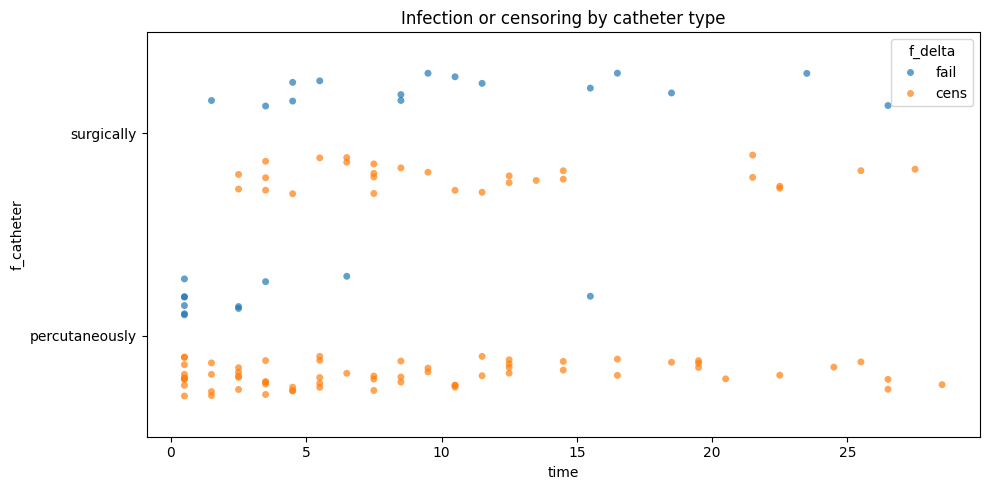

In [7]:
plt.figure(figsize=(10, 5))
sns.stripplot(
    data=KIDNEY,
    x="time",
    y="f_catheter",
    hue="f_delta",
    jitter=0.2,
    dodge=True,
    alpha=0.7,
)
plt.title("Infection or censoring by catheter type")
plt.tight_layout()
plt.show()

# Questions

- Q1 Using built-in functions
  - Estimate the Kaplan-Meier (KM) risk curve for the surgically placed catheter group.
  - Plot the curve
  - Estimate the KM risk curve for both catheter groups and plot them.
- Q2 Continuous time estimation by hand
  - Estimate the KM risk and survival curves using the methods in the note “Risk and Survival Estimation for Survival Data” (the note in the following) page 10.
  - Compare your risk/survival estimates to those using the built-in functions (in R use this code to get the numbers: summary(<survfit-object>)) to ensure you calculate the same thing.
- Q3 Discrete-time estimation by hand
  - Estimate the hazard (no bias adjustment) using the method in the note page 11-12.
  - Estimate the same non-parametric hazard using a logistic regression and confirm that you get the same hazard estimates.
  - Now estimate the hazard by assuming constant, linear, polynomial and spline functional forms.
  - Plot and compare the hazards
  - Plot and compare the risk of infection based on the different functional forms for the hazard.
  - Which hazard model do you prefer? Informally we seek a model that appropriately captures the systematic variation without over-fitting. You may also compare the models in terms of their residual deviance or likelihood, but use it as a rough guide; no formal hypothesis testing here (in R models are compared using anova(<model1>, <model2>, ..., test="Chi")).
- Q4 Effect estimation in discrete time
  - Estimate the hazard assuming constant, linear, polynomial and spline functional forms. Ensure that you always include the interaction with treatment, eg. f_catheter * (n_time + n_time_squared) in a quadratic polynomial fit such that the functional form is allowed independently for each of the treatment levels.
  - Plot the hazard functions for the combinations of treatment and functional form. Does the hazard appear to be different for the two treatments?
  - Also plot the risk functions.
  - Now assume a linear functional form for the hazards and plot the hazard functions for the two treatments in the same graph.
  - Similarly, plot the risk functions for the two treatments in the same graph assuming linear functional forms for the hazards. Describe in words how the risk of infection developes under the two treatments.
  - Calculate the hazard ratio (HR) and risk ratio (RR) as functions of time for surgical relative to percutaneous catheter placement.
    - Is the hazard ratio constant over time?
    - Is the risk ratio constant over time?
    - Is it reasonable to communicate the hazard ratio as a “risk ratio”?
  - Lastly we will fit a standard Cox model to these data. In R this is obtained with coxph(Surv(time, event=(delta==1)) ~ f_catheter, data=kidney).
    - What is the hazard ratio from this model?
    - Does the hazard ratio reasonably represent the relation between the hazards of the two treatments?
  - The Cox model assumes that the hazards under each treatment are proportional, that is, that their ratio (ie., the HR) is constant with time. A standard test of this assumption is provided by the cox.zph function. Does the p-value provided by this test indicate that the proportional hazards assumption is satisfied for this model?

# Answers

## Q1 – Kaplan–Meier Cumulative-Risk Curves (Built-in Functions)

  - Estimate the Kaplan-Meier (KM) risk curve for the surgically placed catheter group.
  - Plot the curve
  - Estimate the KM risk curve for both catheter groups and plot them.

### built-in functions + pandas + numpy + matplotlib

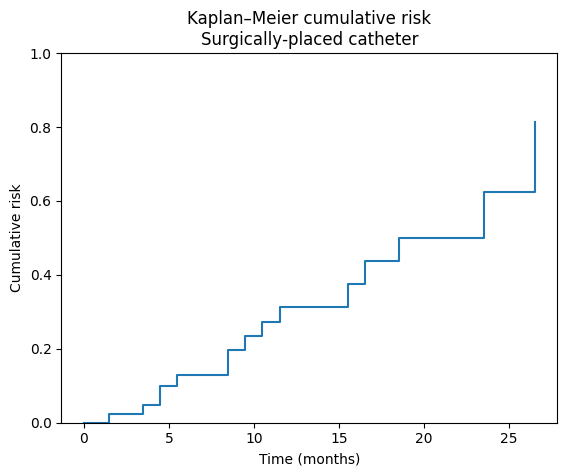

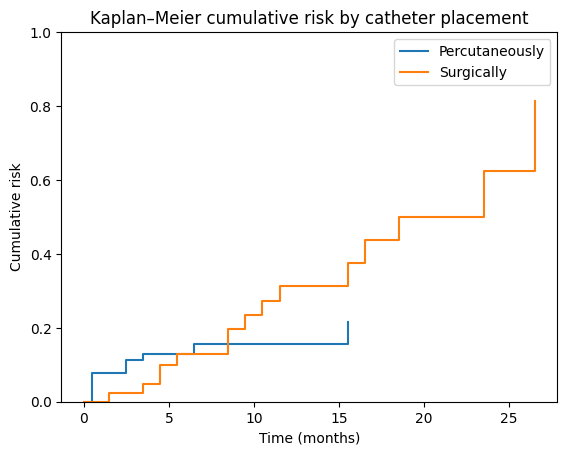

In [8]:
def km_curve(times, events):
    """Return cumulative risk step function (t, risk_values)."""
    df = pd.DataFrame({"time": times, "event": events})
    df = df.sort_values("time")
    unique_times = np.sort(df["time"].unique())
    n_at_risk = len(df)
    survival = 1.0
    t_vals = [0.0]
    risk_vals = [0.0]
    for t in unique_times:
        n_events = ((df["time"] == t) & (df["event"] == 1)).sum()
        if n_events == 0:
            n_at_risk -= (df["time"] == t).sum()  # only censored
            continue
        survival *= 1 - n_events / n_at_risk
        risk = 1 - survival
        t_vals.append(t)
        risk_vals.append(risk)
        n_at_risk -= (df["time"] == t).sum()  # remove everyone at this time
    return t_vals, risk_vals


# 1. Surgically placed group
surg = kidney[kidney["f_catheter"] == "surgically"]
t_surg, r_surg = km_curve(surg["time"].values, surg["delta"].values)

plt.figure()
plt.step(t_surg, r_surg, where="post")
plt.ylim(0, 1)
plt.xlabel("Time (months)")
plt.ylabel("Cumulative risk")
plt.title("Kaplan–Meier cumulative risk\nSurgically‑placed catheter")
plt.show()

# 2. Both groups
plt.figure()
for grp_name, grp_df in kidney.groupby("f_catheter"):
    t_grp, r_grp = km_curve(grp_df["time"].values, grp_df["delta"].values)
    plt.step(t_grp, r_grp, where="post", label=grp_name.capitalize())

plt.ylim(0, 1)
plt.xlabel("Time (months)")
plt.ylabel("Cumulative risk")
plt.title("Kaplan–Meier cumulative risk by catheter placement")
plt.legend()
plt.show()

### lifelines

  - Estimate the Kaplan-Meier (KM) risk curve for the surgically placed catheter group.

In [11]:
kmf = KaplanMeierFitter(alpha=ALPHA).fit(
    durations=kidney.loc[kidney["f_catheter"].eq("surgically"), "time"],
    event_observed=kidney.loc[kidney["f_catheter"].eq("surgically"), "delta"],
    label="Surgically",
)

  - Plot the curve

[(0.0, 1.0),
 Text(0.5, 0, 'Time (months)'),
 Text(0, 0.5, 'Cumulative risk'),
 Text(0.5, 1.0, 'Kaplan–Meier cumulative risk')]

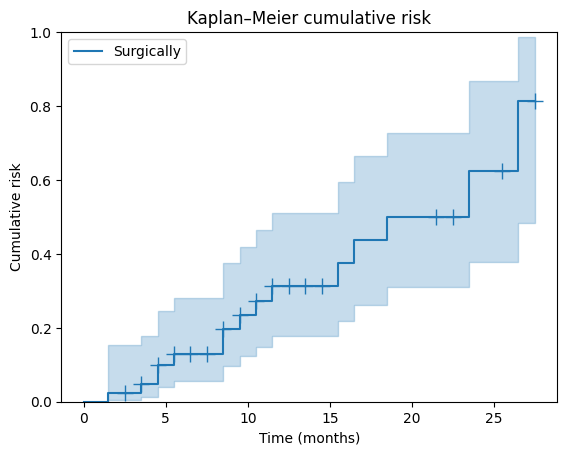

In [12]:
kmf.plot_cumulative_density(ci_show=True, show_censors=True).set(
    ylim=(0, 1),
    xlabel="Time (months)",
    ylabel="Cumulative risk",
    title="Kaplan–Meier cumulative risk",
)

  - Estimate the KM risk curve for both catheter groups and plot them.

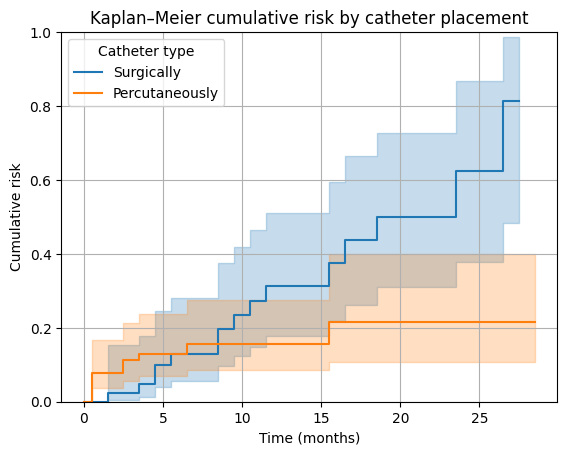

In [13]:
fig, ax = plt.subplots()

for grp, df in sorted(KIDNEY.groupby("f_catheter"), reverse=True):
    KaplanMeierFitter(alpha=ALPHA).fit(
        df["time"], df["delta"], label=grp.capitalize()
    ).plot_cumulative_density(ci_show=True)

ax.set(
    ylim=(0, 1),
    xlabel="Time (months)",
    ylabel="Cumulative risk",
    title="Kaplan–Meier cumulative risk by catheter placement",
)

ax.grid(True)
ax.legend(title="Catheter type")

plt.show()

## Q2 – Continuous-Time KM Estimation “by Hand”

  - Estimate the KM risk and survival curves using the methods in the note “Risk and Survival Estimation for Survival Data” (the note in the following) page 10.

The Kaplan–Meier estimator of the survival function at time $t_j$ is:

$$
\hat{S}(t_j) = \prod_{k=1}^j \left(1 - \frac{d_k}{r_k} \right) \tag{6}
$$

Where:

- $d_j$: number of **events** (failures) at time $t_j$
- $n_j$: number of **observations leaving** at $t_j$ (events + censored)
- $r_j$: number of **individuals at risk just before** $t_j$
- $\hat{S}(t_j)$: estimated **survival probability** at $t_j$
- $\hat{F}(t_j) = 1 - \hat{S}(t_j)$: estimated **cumulative incidence** (risk) at $t_j$

In [14]:
surg = KIDNEY.query("f_catheter == 'surgically'").sort_values("time")

# Step 1: Create risk table
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html
risk_table = surg.groupby("time")["delta"].agg(d_j="sum", n_j="size").sort_index()

# Step 2: Compute r_j = number at risk just before t_j
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html
risk_table["r_j"] = len(surg) - risk_table["n_j"].cumsum().shift(fill_value=0)

# Step 3: Compute survival and risk
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumprod.html
risk_table["hat_S"] = (1 - risk_table["d_j"] / risk_table["r_j"]).cumprod()
risk_table["hat_F"] = 1 - risk_table["hat_S"]

# hat_h_j = hazard = risk_table["d_j"] / risk_table["r_j"]
# hat_lambda = hazard_cumulative = risk_table["h_j"].cumsum()

risk_table

,d_j,n_j,r_j,hat_S,hat_F
time,,,,,
1.5,1,1,43,0.976744,0.023256
2.5,0,2,42,0.976744,0.023256
3.5,1,4,40,0.952326,0.047674
4.5,2,3,36,0.899419,0.100581
5.5,1,2,33,0.872163,0.127837
6.5,0,2,31,0.872163,0.127837
7.5,0,4,29,0.872163,0.127837
8.5,2,3,25,0.802390,0.197610
9.5,1,2,22,0.765918,0.234082


  - Compare your risk/survival estimates to those using the built-in functions (in R use this code to get the numbers: summary(<survfit-object>)) to ensure you calculate the same thing.

In [15]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter(alpha=ALPHA)
kmf.fit(surg["time"], event_observed=surg["delta"])

S_lifelines = kmf.survival_function_at_times(risk_table.index).values
F_lifelines = 1 - S_lifelines

S_manual = risk_table["hat_S"].values
F_manual = risk_table["hat_F"].values

assert np.allclose(S_manual, S_lifelines, atol=1e-12)
assert np.allclose(F_manual, F_lifelines, atol=1e-12)
print("✅ Manual KM matches lifelines exactly 🥔🦙⛰️🐹")

✅ Manual KM matches lifelines exactly 🥔🦙⛰️🐹


## Q3 – Discrete-Time Hazard Estimation and Model Comparison

### Q3.1 – Non-parametric discrete-time hazard estimation

- Estimate the hazard (no bias adjustment) using the method in the note page 11-12.

| Column | Symbol | Meaning |
|--------|--------|---------|
| `t_j`  | — | Upper edge of interval *j* (e.g. 2 mo, 4 mo when `TIME_STEP = 2`) |
| `d_j`  | $d_j$ | Number of **events** (failures) in interval *j* |
| `exits`| — | Subjects leaving (events + censored) in interval *j* |
| `r_j`  | $r_j$ | At-risk population **just before** interval *j*<br/>$r_j = N - \sum_{k<j} \text{exits}_k$ |
| `h_j`  | $\hat h_j$ | **Discrete-time hazard** (no bias adjustment)<br/>$\displaystyle \hat h_j = \frac{d_j}{r_j}$ |
| `S_hat`| $\hat S(t_j)$ | Survival through interval *j*<br/>$\displaystyle \hat S(t_j) = \prod_{k=1}^{j}(1-\hat h_k)$ |
| `F_hat`| $\hat F(t_j)$ | Cumulative risk up to $t_j$<br/>$\displaystyle \hat F(t_j)=1-\hat S(t_j)$ |

In [ ]:
for time_step in (1.0, 2.0):
    edges = np.arange(0, np.ceil(KIDNEY["time"].max()) + time_step, time_step)

    # Subset surgically inserted catheters
    surg = KIDNEY.query("f_catheter == 'surgically'").copy()
    surg["t_j"] = pd.cut(
        surg["time"],
        bins=edges,
        labels=edges[1:],
        right=True,
        include_lowest=False,
    )

    # Compute interval-wise exits and deaths
    table = (
        surg.groupby("t_j", observed=True)["delta"]
        .agg(d_j="sum", exits="size")
        .reset_index()
    )

    # Compute at-risk population and hazards
    table["r_j"] = len(surg) - table["exits"].cumsum().shift(fill_value=0)
    table["h_j"] = table["d_j"] / table["r_j"]  # discrete hazard
    table["S_hat"] = (1 - table["h_j"]).cumprod()  # survival
    table["F_hat"] = 1 - table["S_hat"]  # cumulative risk

    print("time_step", time_step)
    display(table[["t_j", "r_j", "d_j", "h_j", "S_hat", "F_hat"]].tail())


time_step 0.5


,t_j,r_j,d_j,h_j,S_hat,F_hat
18,22.5,6,0,0.00,0.499781,0.500219
19,23.5,4,1,0.25,0.374836,0.625164
20,25.5,3,0,0.00,0.374836,0.625164
21,26.5,2,1,0.50,0.187418,0.812582
22,27.5,1,0,0.00,0.187418,0.812582


time_step 1.0


,t_j,r_j,d_j,h_j,S_hat,F_hat
18,23.0,6,0,0.00,0.499781,0.500219
19,24.0,4,1,0.25,0.374836,0.625164
20,26.0,3,0,0.00,0.374836,0.625164
21,27.0,2,1,0.50,0.187418,0.812582
22,28.0,1,0,0.00,0.187418,0.812582


time_step 2.0


,t_j,r_j,d_j,h_j,S_hat,F_hat
9,20.0,9,1,0.111111,0.511187,0.488813
10,22.0,8,0,0.000000,0.511187,0.488813
11,24.0,6,1,0.166667,0.425989,0.574011
12,26.0,3,0,0.000000,0.425989,0.574011
13,28.0,2,1,0.500000,0.212995,0.787005


### Q3.2 – Non-parametric discrete-time logistic regression

| Name | In code | Meaning |
|------|---------|---------|
| interval label | `t_j` | Upper edge of time interval *j* (e.g. 2, 4, 6 months) |
| events | `d_j` | Number of failures in interval *j* |
| at-risk | `r_j` | Individuals alive at **start** of interval *j* |
| manual hazard | `h_j` | Non-parametric hazard, `d_j / r_j` |
| GLM response | `prop` | Proportion of events, `d_j / r_j` |
| GLM weight | `freq_weights` | Number of trials in binomial GLM (`r_j`) |
| GLM predictor matrix | `C(t_j) - 1` | One dummy column per interval, no intercept (saturated) |
| GLM hazard | `h_glm` | Fitted probability from the saturated logistic model |

- a) Estimate the same non-parametric hazard using a logistic regression

In [63]:
# glm endog exog

import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning
import warnings

# One-hot design matrix (no intercept → saturated model)
X = pd.get_dummies(table["t_j"], drop_first=False)
y = table["d_j"] / table["r_j"]

# Suppress annoying "perfect separation" warning
warnings.filterwarnings("ignore", category=PerfectSeparationWarning)

glm_sat = sm.GLM(
    endog=y,
    exog=X,
    family=sm.families.Binomial(),
    #    freq_weights=table["r_j"],
).fit()

table["h_glm"] = glm_sat.predict(X)

In [64]:
# glm formula

import statsmodels.formula.api as smf

# Build an interval-level data frame from the Q3.1 table
df_int = table[["t_j", "d_j", "r_j"]].copy()
df_int["prop"] = df_int["d_j"] / df_int["r_j"]  # events per risk set

# Saturated logit: one coefficient per interval, no intercept
glm_sat = smf.glm(
    formula="prop ~ C(t_j) - 1",
    data=df_int,
    family=sm.families.Binomial(),
    #    freq_weights=df_int["r_j"],
).fit()

table["h_glm"] = glm_sat.fittedvalues

- b) confirm that you get the same hazard estimates.

In [65]:
h_manual = table["h_j"].mask(table["h_j"] < 1e-12, 0.0)
h_glm = table["h_glm"].mask(table["h_glm"] < 1e-12, 0.0)

assert np.allclose(h_manual, h_glm, atol=1e-6)
print("✅  Logistic-regression hazards match manual h_j exactly.")

✅  Logistic-regression hazards match manual h_j exactly.


### Q3.3 Parametric hazard models

- Now estimate the hazard by assuming constant, linear, polynomial and spline functional forms.

In [35]:
import numpy as np
import statsmodels.api as sm
from patsy import dmatrix

# Copy table and add numeric time
df = table.copy()
df["time_num"] = df["t_j"].astype(float)

# Binomial response: [deaths, survivors]
y = np.column_stack([df["d_j"], df["r_j"] - df["d_j"]])

# Constant hazard model
X_const = np.ones((len(df), 1))
m_const = sm.GLM(y, X_const, family=sm.families.Binomial()).fit()
df["h_const"] = m_const.predict(X_const)

# Linear time trend
X_lin = sm.add_constant(df["time_num"])
m_lin = sm.GLM(y, X_lin, family=sm.families.Binomial()).fit()
df["h_linear"] = m_lin.predict(X_lin)

# Cubic polynomial in time
X_poly = np.column_stack(
    [
        np.ones(len(df)),
        df["time_num"],
        df["time_num"] ** 2,
        df["time_num"] ** 3,
    ]
)
m_poly = sm.GLM(y, X_poly, family=sm.families.Binomial()).fit()
df["h_poly"] = m_poly.predict(X_poly)

# Natural cubic spline with 4 degrees of freedom
X_spline = dmatrix(
    "bs(time_num, df=4, include_intercept=True)",
    data=df,
    return_type="dataframe",
)
m_spline = sm.GLM(y, X_spline, family=sm.families.Binomial()).fit()
df["h_spline"] = m_spline.predict(X_spline)

# Deviance comparison
for name, model in {
    "Constant": m_const,
    "Linear": m_lin,
    "Polynomial": m_poly,
    "Spline": m_spline,
}.items():
    print(f"{name:>10s}: dev = {model.deviance:.3f} | df = {model.df_resid}")

  Constant: dev = 16.205 | df = 13
    Linear: dev = 13.127 | df = 12
Polynomial: dev = 11.618 | df = 10
    Spline: dev = 11.618 | df = 10


### Q3.4 Hazard curve plots

- Plot and compare the hazards

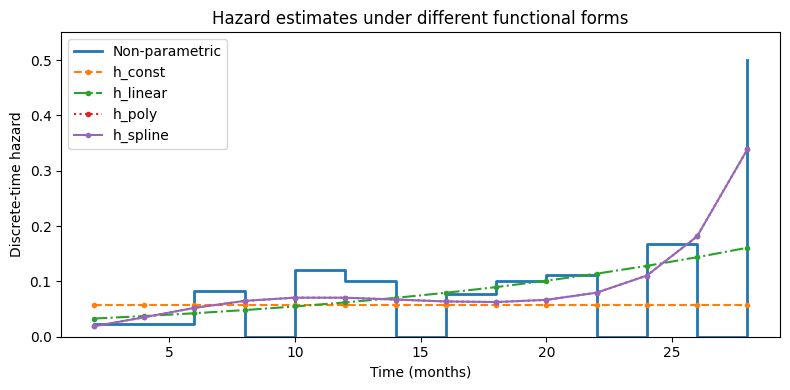

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.step(
    table_model["time_num"],
    table_model["h_j"],
    where="post",
    label="Non-parametric",
    linewidth=2,
)

for col, style in [
    ("h_const", "--"),
    ("h_linear", "-."),
    ("h_poly", ":"),
    ("h_spline", "-"),
]:
    plt.plot(
        table_model["time_num"],
        table_model[col],
        linestyle=style,
        marker="o",
        markersize=3,
        label=col,
    )

plt.xlabel("Time (months)")
plt.ylabel("Discrete-time hazard")
plt.ylim(
    0,
    table_model[["h_j"] + [c for c in table_model.columns if c.startswith("h_")]]
    .max()
    .max()
    * 1.1,
)
plt.legend()
plt.title("Hazard estimates under different functional forms")
plt.tight_layout()
plt.show()

### Q3.5 – Risk curves from alternative hazard models

- Plot and compare the risk of infection based on the different functional forms for the hazard.

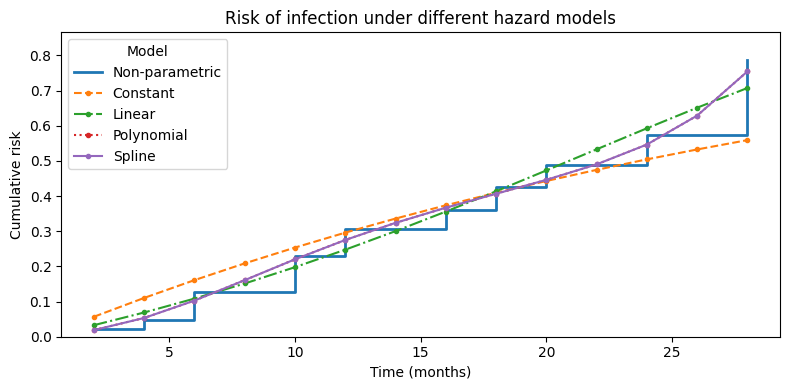

In [37]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1.  Convert every hazard column to survival and risk
# ------------------------------------------------------------------
hazard_cols = ["h_j", "h_const", "h_linear", "h_poly", "h_spline"]

for hcol in hazard_cols:
    s_col = hcol.replace("h_", "S_")  # S_j, S_const, …
    f_col = hcol.replace("h_", "F_")  # F_j, F_const, …
    table_model[s_col] = (1 - table_model[hcol]).cumprod()
    table_model[f_col] = 1 - table_model[s_col]

# ------------------------------------------------------------------
# 2.  Plot the cumulative risk curves
# ------------------------------------------------------------------
plt.figure(figsize=(8, 4))

# Non-parametric reference (step plot)
plt.step(
    table_model["time_num"],
    table_model["F_j"],
    where="post",
    linewidth=2,
    label="Non-parametric",
)

# Parametric models
line_styles = {
    "F_const": ("--", "Constant"),
    "F_linear": ("-.", "Linear"),
    "F_poly": (":", "Polynomial"),
    "F_spline": ("-", "Spline"),
}
for f_col, (ls, lab) in line_styles.items():
    plt.plot(
        table_model["time_num"],
        table_model[f_col],
        linestyle=ls,
        marker="o",
        markersize=3,
        label=lab,
    )

plt.xlabel("Time (months)")
plt.ylabel("Cumulative risk")
plt.ylim(0, table_model.filter(like="F_").max().max() * 1.1)
plt.legend(title="Model")
plt.title("Risk of infection under different hazard models")
plt.tight_layout()
plt.show()


### Q3.6 – Model choice

- Which hazard model do you prefer? Informally we seek a model that appropriately **captures the systematic variation without over-fitting**. You may also compare the models in terms of their residual **deviance** or likelihood, but use it as a rough guide; no formal hypothesis testing here (in R models are compared using anova(<model1>, <model2>, ..., test="Chi")).

In [38]:
for name, mod in {
    "Constant": m_const,
    "Linear": m_lin,
    "Polynomial": m_poly,
    "Spline": m_spline,
}.items():
    print(f"{name:>10s}:  dev = {mod.deviance:.3f}  |  df = {mod.df_resid}")


  Constant:  dev = 16.205  |  df = 13
    Linear:  dev = 13.127  |  df = 12
Polynomial:  dev = 11.618  |  df = 10
    Spline:  dev = 11.618  |  df = 10


## Q4 – Treatment-Effect Estimation in Discrete Time (Hazards, Risks & Cox PH)

### Q4.1 – Effect estimation with discrete-time hazard models (incl. treatment interactions)

  - Estimate the hazard assuming constant, linear, polynomial and spline functional forms. Ensure that you always include the interaction with treatment, eg. f_catheter * (n_time + n_time_squared) in a quadratic polynomial fit such that the functional form is allowed independently for each of the treatment levels.

In [41]:
import numpy as np
import statsmodels.api as sm
from patsy import dmatrix

# Discretise time and summarise events and exits
step = 2.0
edges = np.arange(0, np.ceil(KIDNEY["time"].max()) + step, step)

df = KIDNEY.copy()
df["interval"] = pd.cut(
    df["time"],
    bins=edges,
    labels=edges[1:],
    right=True,
    include_lowest=False,
)

summary = (
    df.groupby(["interval", "f_catheter"], observed=True)["delta"]
    .agg(d_j="sum", exits="size")
    .reset_index()
    .rename(columns={"interval": "t_j"})
)

summary["r_j"] = summary.groupby("f_catheter")["exits"].cumsum().shift(fill_value=0)
max_risk = summary.groupby("f_catheter")["r_j"].transform("max")
summary["r_j"] = max_risk - summary["r_j"]

# Drop rows with no one at risk
summary = summary[summary["r_j"] > 0].copy()

# Add time and group indicator
summary["time_num"] = summary["t_j"].astype(float)
summary["group"] = summary["f_catheter"].eq("percutaneously").astype(int)

# 2-column binomial response
y = np.column_stack([
    summary["d_j"],
    summary["r_j"] - summary["d_j"],
])

# Design matrices and model fits
models = {}
hazards = {}

# Constant model
X_const = sm.add_constant(summary["group"])
models["constant"] = sm.GLM(y, X_const, family=sm.families.Binomial()).fit()
hazards["h_const"] = models["constant"].predict(X_const)

# Linear model with interaction
time = summary["time_num"].values
group = summary["group"].values
X_linear = np.column_stack([
    np.ones(len(summary)),
    time,
    group,
    time * group,
])
models["linear"] = sm.GLM(y, X_linear, family=sm.families.Binomial()).fit()
hazards["h_linear"] = models["linear"].predict(X_linear)

# Cubic polynomial with interaction
X_poly = np.column_stack([
    np.ones(len(summary)),
    time,
    time**2,
    time**3,
    group,
    group * time,
    group * time**2,
    group * time**3,
])
models["polynomial"] = sm.GLM(y, X_poly, family=sm.families.Binomial()).fit()
hazards["h_poly"] = models["polynomial"].predict(X_poly)

# Natural cubic spline with interaction
spline = dmatrix(
    "bs(time_num, df=4, include_intercept=True)",
    data=summary,
    return_type="dataframe",
)
X_spline = np.hstack([
    spline,
    group[:, None] * spline,
])
models["spline"] = sm.GLM(y, X_spline, family=sm.families.Binomial()).fit()
hazards["h_spline"] = models["spline"].predict(X_spline)

# Add fitted hazards to summary
for col, values in hazards.items():
    summary[col] = values

# Deviance output
for name, model in models.items():
    print(f"{name:>10s}: dev = {model.deviance:.3f} | df = {model.df_resid}")

  constant: dev = 33.996 | df = 25
    linear: dev = 21.131 | df = 23
polynomial: dev = 17.443 | df = 19
    spline: dev = 17.443 | df = 19


### Q4.2 Plot hazard functions by treatment and functional form

  - Plot the hazard functions for the combinations of treatment and functional form. Does the hazard appear to be different for the two treatments?

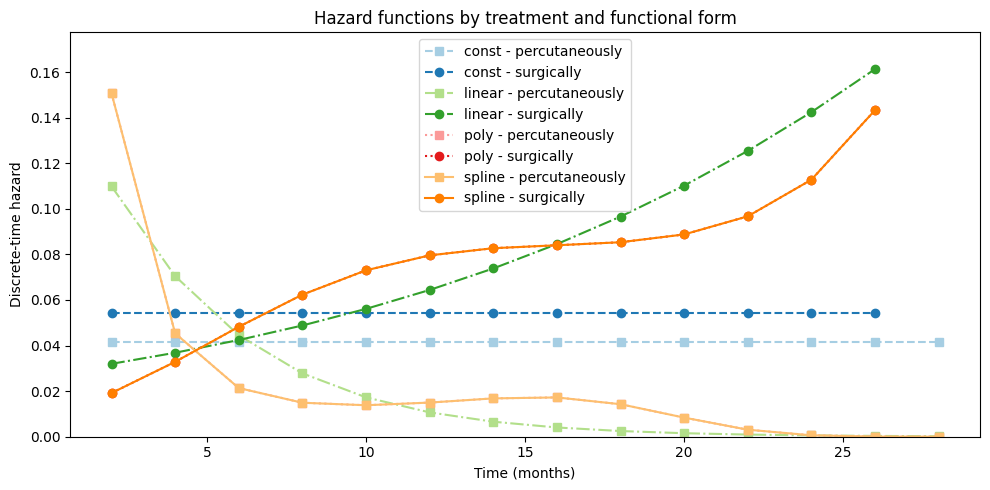

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

line_styles = {
    "h_const": "--",
    "h_linear": "-.",
    "h_poly": ":",
    "h_spline": "-",
}

# Markers per treatment
marker_map = {
    "surgically": "o",
    "percutaneously": "s",
}

# Color map: 4 models × 2 groups = 8 colours
palette = plt.get_cmap("Paired").colors
color_map = {}

# Assign colours by (model, treatment) combo
for i, (model, style) in enumerate(line_styles.items()):
    for j, treatment in enumerate(summary["f_catheter"].unique()):
        color_map[(model, treatment)] = palette[i * 2 + j]

for model, style in line_styles.items():
    for treatment in summary["f_catheter"].unique():
        subset = summary[summary["f_catheter"] == treatment]
        ax.plot(
            subset["t_j"],
            subset[model],
            linestyle=style,
            marker=marker_map[treatment],
            label=f"{model[2:]} - {treatment}",
            color=color_map[(model, treatment)],
        )

ax.set_xlabel("Time (months)")
ax.set_ylabel("Discrete-time hazard")
ax.set_title("Hazard functions by treatment and functional form")
ax.legend()
ax.set_ylim(0, summary[[c for c in summary.columns if c.startswith("h_")]].max().max() * 1.1)
plt.tight_layout()
plt.show()

### Q4.3 Plot risk functions by treatment and functional form

  - Also plot the risk functions.

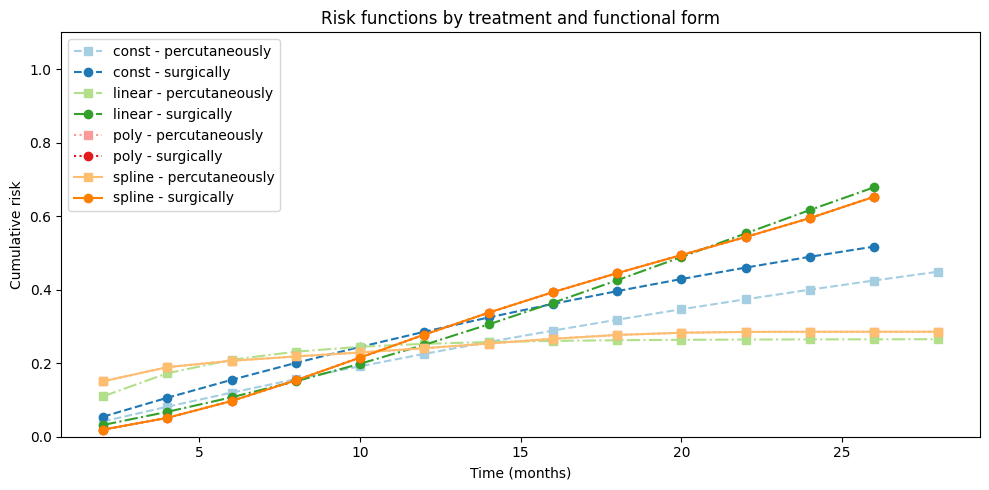

In [45]:
import matplotlib.pyplot as plt

# Compute survival and risk per treatment and model
for hazard_col in hazards.keys():
    surv_col = hazard_col.replace("h_", "S_")
    risk_col = hazard_col.replace("h_", "F_")
    summary[surv_col] = (1 - summary[hazard_col]).groupby(summary["f_catheter"]).cumprod()
    summary[risk_col] = 1 - summary[surv_col]

# ---------- plot cumulative risk functions ----------
fig, ax = plt.subplots(figsize=(10, 5))

for model, linestyle in line_styles.items():
    risk_col = model.replace("h_", "F_")
    for treatment in summary["f_catheter"].unique():
        subset = summary[summary["f_catheter"] == treatment]
        ax.plot(
            subset["t_j"],
            subset[risk_col],
            linestyle=linestyle,
            marker=marker_map[treatment],
            label=f"{model[2:]} - {treatment}",
            color=color_map[(model, treatment)],
        )

ax.set_xlabel("Time (months)")
ax.set_ylabel("Cumulative risk")
ax.set_title("Risk functions by treatment and functional form")
ax.legend()
ax.set_ylim(0, 1.1)
plt.tight_layout()
plt.show()


### Q4.4 Discrete-time hazard functions under linear model

  - Now assume a linear functional form for the hazards and plot the hazard functions for the two treatments in the same graph.

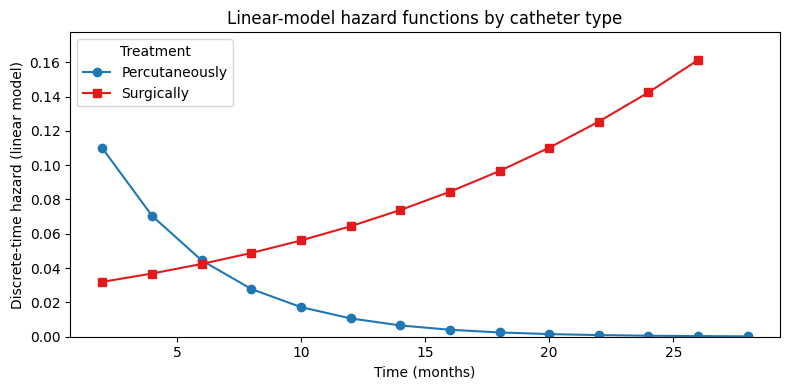

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# ------------------------------------------------------------------
# 1.  Ensure treatment_code is present
# ------------------------------------------------------------------
summary = summary.copy()  # keep original safe
summary["treatment_code"] = summary["f_catheter"].eq("percutaneously").astype(int)

# ------------------------------------------------------------------
# 2.  Fit linear hazard model with interaction
#     logit(hazard) = β0 + β1*time + β2*treatment + β3*time*treatment
# ------------------------------------------------------------------
response = np.column_stack([
    summary["d_j"],                       # events
    summary["r_j"] - summary["d_j"],      # survivors
])

time_numeric = summary["time_num"].values
treatment_code = summary["treatment_code"].values

design_linear = np.column_stack([
    np.ones(len(summary)),                # intercept
    time_numeric,                         # time
    treatment_code,                       # treatment main effect
    time_numeric * treatment_code,        # interaction
])

linear_model = sm.GLM(
    response,
    design_linear,
    family=sm.families.Binomial()
).fit()

summary["hazard_linear"] = linear_model.predict(design_linear)

# ------------------------------------------------------------------
# 3.  Plot linear hazard functions for both treatments
# ------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 4))

color_map = {
    "surgically": "#e31a1c",
    "percutaneously": "#1f78b4",
}
marker_map = {
    "surgically": "s",
    "percutaneously": "o",
}

for treatment in summary["f_catheter"].unique():
    data_t = summary[summary["f_catheter"] == treatment]
    ax.plot(
        data_t["t_j"],
        data_t["hazard_linear"],
        color=color_map[treatment],
        marker=marker_map[treatment],
        linestyle="-",
        label=treatment.capitalize(),
    )

ax.set_xlabel("Time (months)")
ax.set_ylabel("Discrete-time hazard (linear model)")
ax.set_title("Linear-model hazard functions by catheter type")
ax.set_ylim(0, summary["hazard_linear"].max() * 1.1)
ax.legend(title="Treatment")
plt.tight_layout()
plt.show()


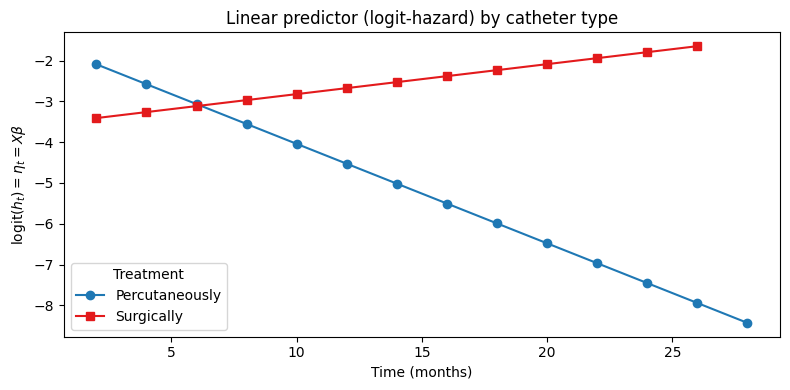

In [ ]:
linear_pred = linear_model.predict(design_linear, which="linear")  # returns logit = Xb
summary["logit_hazard"] = linear_pred

fig, ax = plt.subplots(figsize=(8, 4))
for treatment in summary["f_catheter"].unique():
    data_t = summary.loc[summary["f_catheter"] == treatment]
    ax.plot(
        data_t["t_j"],
        data_t["logit_hazard"],
        marker=marker_map[treatment],
        color=color_map[treatment],
        label=treatment.capitalize(),
    )

ax.set_xlabel("Time (months)")
ax.set_ylabel(r"$\mathrm{logit}(h_t) = \eta_t = X\beta$")
ax.set_title("Linear predictor (logit-hazard) by catheter type")
ax.legend(title="Treatment")
plt.tight_layout()
plt.show()


### Q4.5 Cumulative risk functions under linear hazard model

  - Similarly, plot the risk functions for the two treatments in the same graph assuming linear functional forms for the hazards. Describe in words how the risk of infection developes under the two treatments.

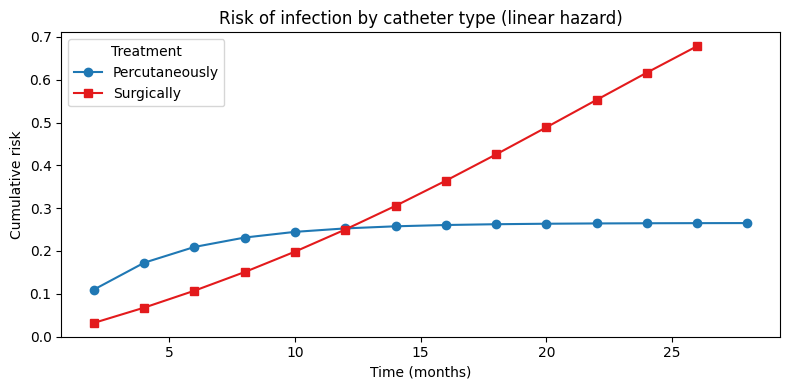

In [ ]:
# Compute survival and risk from linear hazard
summary["S_linear"] = (1 - summary["h_linear"]).groupby(summary["f_catheter"]).cumprod()
summary["F_linear"] = 1 - summary["S_linear"]

# Plot cumulative risk
fig, ax = plt.subplots(figsize=(8, 4))
for treatment in summary["f_catheter"].unique():
    subset = summary[summary["f_catheter"] == treatment]
    ax.plot(
        subset["t_j"],
        subset["F_linear"],
        marker=marker_map[treatment],
        color=color_map[treatment],
        label=treatment.capitalize(),
    )

ax.set_xlabel("Time (months)")
ax.set_ylabel("Cumulative risk")
ax.set_title("Risk of infection by catheter type (linear hazard)")
ax.legend(title="Treatment")
plt.tight_layout()
plt.show()

### Q4.6 Hazard ratio (HR) and risk ratio (RR) over time: surgical vs. percutaneous

  - Calculate the hazard ratio (HR) and risk ratio (RR) as functions of time for surgical relative to percutaneous catheter placement.
    - Is the hazard ratio constant over time?
    - Is the risk ratio constant over time?
    - Is it reasonable to communicate the hazard ratio as a “risk ratio”?

In [54]:
# Pivot table to align hazards and risks by treatment
pivot = summary.pivot(index="t_j", columns="f_catheter", values=["h_linear", "F_linear"])
pivot.columns = ["h_linear_perc", "h_linear_surg", "F_linear_perc", "F_linear_surg"]
pivot = pivot.reset_index()

# Hazard ratio (surgical / percutaneous)
pivot["HR"] = pivot["h_linear_surg"] / pivot["h_linear_perc"]

# Risk ratio (surgical / percutaneous)
pivot["RR"] = pivot["F_linear_surg"] / pivot["F_linear_perc"]

# Show table
pivot[["t_j", "h_linear_surg", "h_linear_perc", "HR", "F_linear_surg", "F_linear_perc", "RR"]].round(3)


,t_j,h_linear_surg,h_linear_perc,HR,F_linear_surg,F_linear_perc,RR
0,2.0,0.032,0.110,0.291,0.032,0.110,0.291
1,4.0,0.037,0.070,0.523,0.068,0.173,0.392
2,6.0,0.042,0.044,0.954,0.107,0.209,0.512
3,8.0,0.049,0.028,1.755,0.151,0.231,0.652
4,10.0,0.056,0.017,3.248,0.198,0.245,0.811
5,12.0,0.064,0.011,6.030,0.250,0.253,0.989
6,14.0,0.074,0.007,11.207,0.305,0.258,1.185
7,16.0,0.084,0.004,20.832,0.364,0.261,1.397
8,18.0,0.097,0.002,38.697,0.425,0.262,1.621
9,20.0,0.110,0.002,71.789,0.489,0.264,1.854


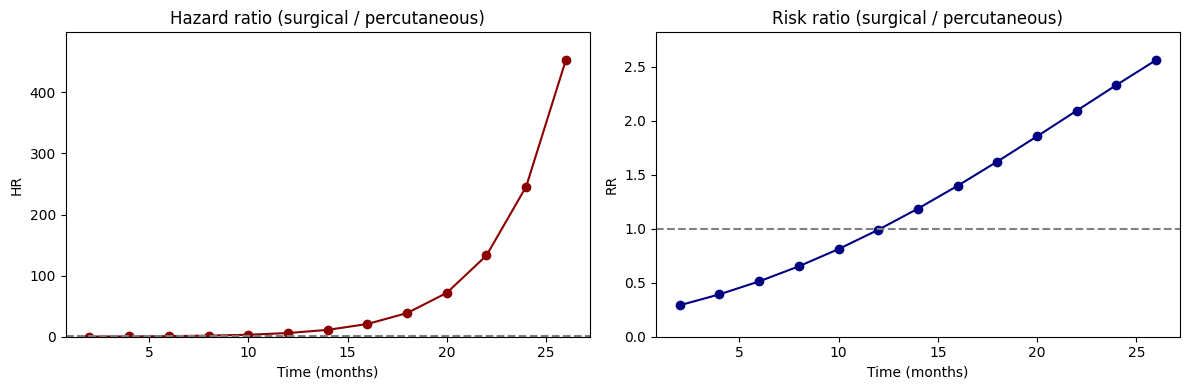

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

# Plot HR
ax[0].plot(pivot["t_j"], pivot["HR"], marker="o", color="darkred")
ax[0].axhline(1, linestyle="--", color="gray")
ax[0].set_title("Hazard ratio (surgical / percutaneous)")
ax[0].set_xlabel("Time (months)")
ax[0].set_ylabel("HR")
ax[0].set_ylim(0, pivot["HR"].max() * 1.1)

# Plot RR
ax[1].plot(pivot["t_j"], pivot["RR"], marker="o", color="navy")
ax[1].axhline(1, linestyle="--", color="gray")
ax[1].set_title("Risk ratio (surgical / percutaneous)")
ax[1].set_xlabel("Time (months)")
ax[1].set_ylabel("RR")
ax[1].set_ylim(0, pivot["RR"].max() * 1.1)

plt.tight_layout()
plt.show()

- Is the hazard ratio constant over time?
  - No
- Is the risk ratio constant over time?
  - No
- Is it reasonable to communicate the hazard ratio as a “risk ratio”?
  - No, the HR is the instantaneous risk.

### Q4.7 Cox proportional hazards model: effect of catheter type

  - Lastly we will fit a standard Cox model to these data. In R this is obtained with coxph(Surv(time, event=(delta==1)) ~ f_catheter, data=kidney).
    - What is the hazard ratio from this model?
    - Does the hazard ratio reasonably represent the relation between the hazards of the two treatments?

In [59]:
# https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html
from lifelines import CoxPHFitter

# Copy the data and make sure it’s in long format with event and duration
df_cox = KIDNEY.copy()
df_cox = df_cox[["time", "delta", "f_catheter"]].copy()
df_cox["f_catheter"] = df_cox["f_catheter"].astype("category")

# Encode treatment as 0/1: 0 = surgical, 1 = percutaneous
df_cox["treatment"] = (df_cox["f_catheter"] == "percutaneously").astype(int)

# Fit Cox model
cph = CoxPHFitter()
cph.fit(df_cox[["time", "delta", "treatment"]], duration_col="time", event_col="delta")

# Show summary with HR
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 119 total observations, 93 right-censored observations>
             duration col = 'time'
                event col = 'delta'
      baseline estimation = breslow
   number of observations = 119
number of events observed = 26
   partial log-likelihood = -103.03
         time fit was run = 2025-06-26 01:14:10 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
treatment -0.61      0.54      0.40           -1.39            0.17                0.25                1.18

           cmp to     z    p  -log2(p)
covariate                             
treatment    0.00 -1.54 0.12      3.02
---
Concordance = 0.50
Partial AIC = 208.06
log-likelihood ratio test = 2.41 on 1 df
-log2(p) of ll-ratio test = 3.05

$$
\text{HR} =
\frac{h(t \mid X=0)}{h(t \mid X=1)} = \exp(\beta) = \exp(\text{coef})
$$

- What is the hazard ratio from this model?
  -  exp(coef) 0.54
  -  hazard 46% lower for surg
- Does the hazard ratio reasonably represent the relation between the hazards of the two treatments?
  - No...

### Q4.8 Proportional hazards assumption check using Schoenfeld residuals

  - The Cox model assumes that the hazards under each treatment are proportional, that is, that their ratio (ie., the HR) is constant with time. A standard test of this assumption is provided by the cox.zph function. Does the p-value provided by this test indicate that the proportional hazards assumption is satisfied for this model?

In [61]:
cph.check_assumptions(df_cox[["time", "delta", "treatment"]], p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 119 total observations, 93 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic      p  -log2(p)
treatment km              6.94   0.01      6.89
          rank            9.53 <0.005      8.95



1. Variable 'treatment' failed the non-proportional test: p-value is 0.0020.

   Advice: with so few unique values (only 2), you can include `strata=['treatment', ...]` in the
call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[]

- Does the p-value provided by this test indicate that the proportional hazards assumption is satisfied for this model?
  - No, p < alpha


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 119 total observations, 93 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic      p  -log2(p)
treatment km              6.94   0.01      6.89
          rank            9.53 <0.005      8.95



1. Variable 'treatment' failed the non-proportional test: p-value is 0.0020.

   Advice: with so few unique values (only 2), you can include `strata=['treatment', ...]` in the
call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<Axes: xlabel='rank-transformed time\n(p=0.0020)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0085)'>]]

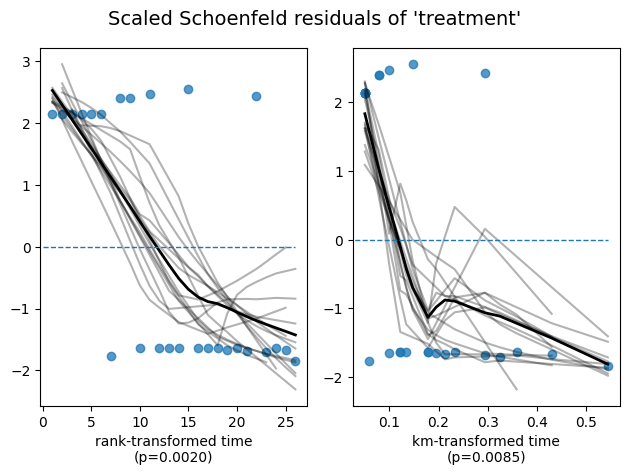

In [62]:
# Q4.8 – proportional-hazards diagnostics (with plots)
import pandas as pd
from lifelines import CoxPHFitter

# --- 1. prepare a numeric treatment indicator -----------------------------
df_cox = KIDNEY[["time", "delta", "f_catheter"]].copy()
df_cox["treatment"] = (df_cox["f_catheter"] == "percutaneously").astype(int)

# --- 2. fit the (simple) Cox model ----------------------------------------
cph = CoxPHFitter()
cph.fit(
    df_cox[["time", "delta", "treatment"]],
    duration_col="time",
    event_col="delta",
)

# --- 3. Schoenfeld-style test + diagnostic plots --------------------------
# p-value threshold 0.05 and plots on
cph.check_assumptions(
    df_cox[["time", "delta", "treatment"]],
    p_value_threshold=0.05,
    show_plots=True,
)
